In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [4]:
# Download stopwords and lemmatizer resources
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...


In [5]:
# Load the dataset
df = pd.read_csv('Resume/Resume.csv')

# View the first few rows to understand the structure
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [6]:
# Preprocessing function
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove special characters, punctuation, and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove stopwords and lemmatize words
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words)
    return text

In [7]:
# Apply preprocessing to the 'resume_str' column
df['processed_resume'] = df['Resume_str'].apply(preprocess_text)

In [8]:
# Define input and target variables
X = df['processed_resume']  # Preprocessed text data
y = df['Category']          # Target variable (job category)

In [9]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Vectorize text data using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [11]:
# Importing Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [12]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

In [13]:
# Train each model, evaluate, and store results
model_accuracies = {}

for model_name, model in models.items():
    # Train model
    model.fit(X_train_tfidf, y_train)
    # Predict on test set
    y_pred = model.predict(X_test_tfidf)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.64
SVM Accuracy: 0.63
Random Forest Accuracy: 0.67


In [14]:
# Identify the best model
best_model = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model]

In [15]:
# Display best model
print(f"\nBest Model: {best_model} with Accuracy: {best_accuracy:.2f}")


Best Model: Random Forest with Accuracy: 0.67


In [16]:
# Print classification report for the best model
print("\nClassification Report for Best Model:")
best_model_instance = models[best_model]
best_y_pred = best_model_instance.predict(X_test_tfidf)
print(classification_report(y_test, best_y_pred))


Classification Report for Best Model:
                        precision    recall  f1-score   support

            ACCOUNTANT       0.75      0.93      0.83        29
              ADVOCATE       0.86      0.80      0.83        30
           AGRICULTURE       0.50      0.25      0.33         8
               APPAREL       0.64      0.45      0.53        20
                  ARTS       0.25      0.11      0.15        18
            AUTOMOBILE       0.00      0.00      0.00         6
              AVIATION       0.83      0.90      0.86        21
               BANKING       0.77      0.74      0.76        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.75      0.44      0.56        27
                  CHEF       0.85      0.71      0.77        24
          CONSTRUCTION       0.88      0.82      0.85        34
            CONSULTANT       0.80      0.40      0.53        20
              DESIGNER       0.68      0.89      0.77        19


c:\Users\MSI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MSI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MSI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

C:\Users\MSI\AppData\Local\Temp\ipykernel_22448\4130249688.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')


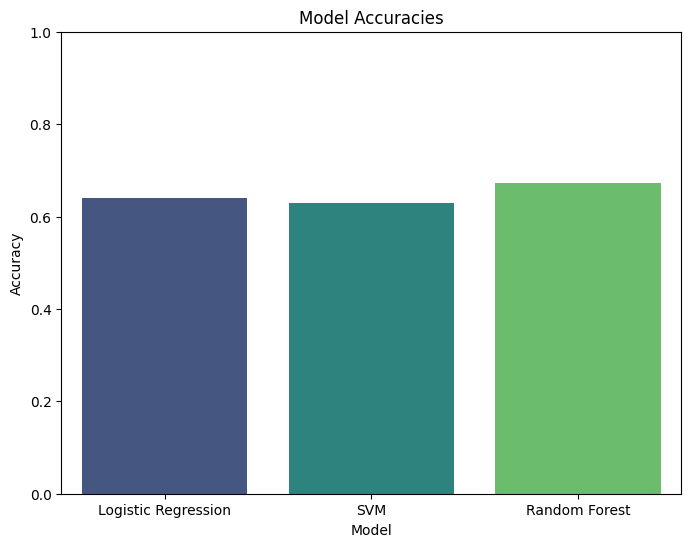

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert model accuracies to a DataFrame for easy plotting
accuracy_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])

# Plot the model accuracies as a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')
plt.title('Model Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.show()

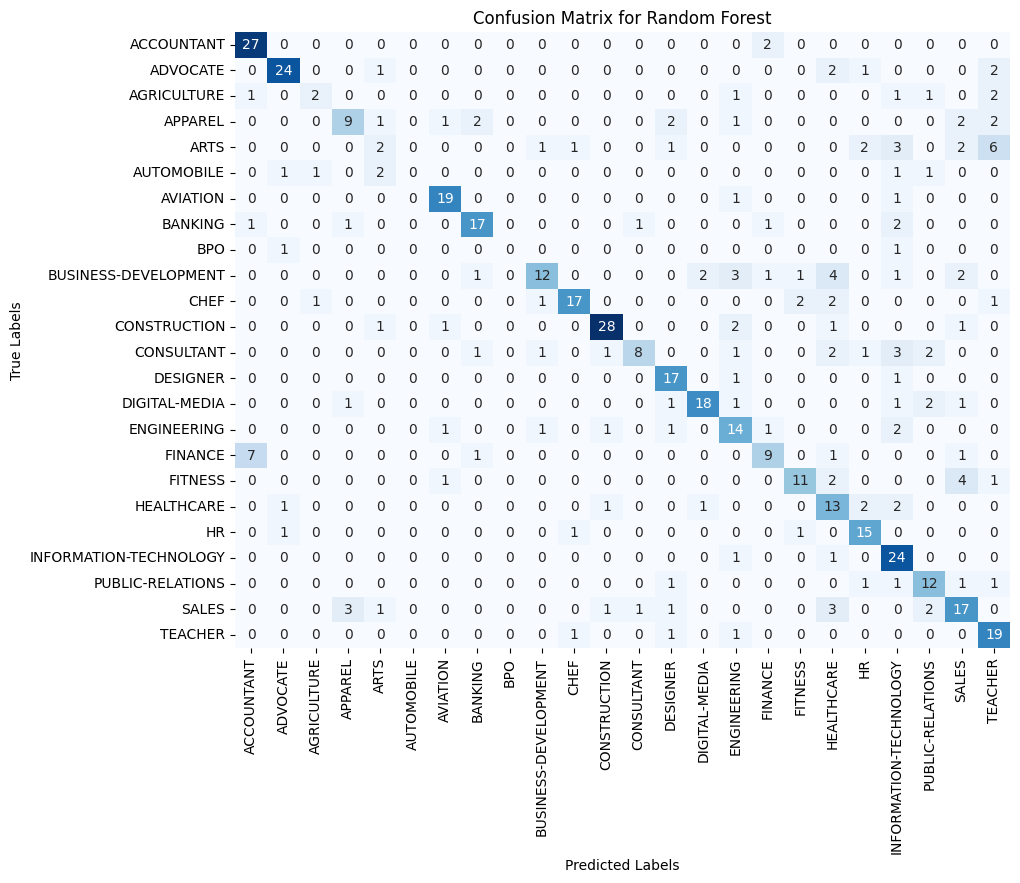

In [18]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for the best model
conf_matrix = confusion_matrix(y_test, best_y_pred)

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=best_model_instance.classes_,
            yticklabels=best_model_instance.classes_)
plt.title(f'Confusion Matrix for {best_model}')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [19]:
import joblib

# Save the TF-IDF vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.joblib')

# Save each model
for model_name, model in models.items():
    joblib.dump(model, f'{model_name.lower().replace(" ", "_")}_model.joblib')

# Save class labels for the best model (useful if classes are not in alphabetical order)
joblib.dump(best_model_instance.classes_, 'class_labels.joblib')

['class_labels.joblib']